In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [17]:
haar_df = pd.read_csv("results/HAAR_results.csv")
haar_df['Transform'] = "HAAR"
sp_df = pd.read_csv("results/SP_results.csv")
sp_df['Transform'] = "SP"
merged_df = pd.concat([haar_df, sp_df], axis=0, ignore_index=True)
merged_df = merged_df[merged_df['dataset'] != 'SUMMARY']
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 0 to 709
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dataset              698 non-null    object 
 1   image_path           698 non-null    object 
 2   mse                  698 non-null    object 
 3   psnr                 698 non-null    object 
 4   original_entropy     698 non-null    object 
 5   transformed_entropy  698 non-null    object 
 6   quantized_entropy    698 non-null    object 
 7   encode_ms            698 non-null    float64
 8   quant_ms             698 non-null    float64
 9   entropy_enc_ms       698 non-null    float64
 10  entropy_dec_ms       698 non-null    float64
 11  dequant_ms           698 non-null    float64
 12  inverse_ms           698 non-null    float64
 13  error                0 non-null      object 
 14  Transform            698 non-null    object 
dtypes: float64(6), object(9)
memory usage: 87.2+ 

,dataset,image_path,mse,psnr,original_entropy,transformed_entropy,quantized_entropy,encode_ms,quant_ms,entropy_enc_ms,entropy_dec_ms,dequant_ms,inverse_ms,error,Transform
0,AerialImages,Datasets\AerialImages\11.png,16.148,36.0496,7.35337,1.66234,1.66234,101.7090,0.0,0.0,0.0,0.0,79.1230,NaN,HAAR
1,AerialImages,Datasets\AerialImages\12.png,15.8815,36.1219,6.3301,1.46995,1.46995,116.7770,0.0,0.0,0.0,0.0,93.4076,NaN,HAAR
2,AerialImages,Datasets\AerialImages\13.png,17.0095,35.8239,6.56738,1.9132,1.9132,27.9375,0.0,0.0,0.0,0.0,25.3539,NaN,HAAR
3,AerialImages,Datasets\AerialImages\14.png,16.0822,36.0674,7.57873,1.91483,1.91483,27.4865,0.0,0.0,0.0,0.0,23.0063,NaN,HAAR
4,AerialImages,Datasets\AerialImages\15.png,16.1044,36.0613,6.67723,1.59168,1.59168,115.0320,0.0,0.0,0.0,0.0,101.9310,NaN,HAAR


In [30]:
metrics = ['mse', 'psnr']
for metric in metrics:
    merged_df[metrics] = merged_df[metrics].astype(float)

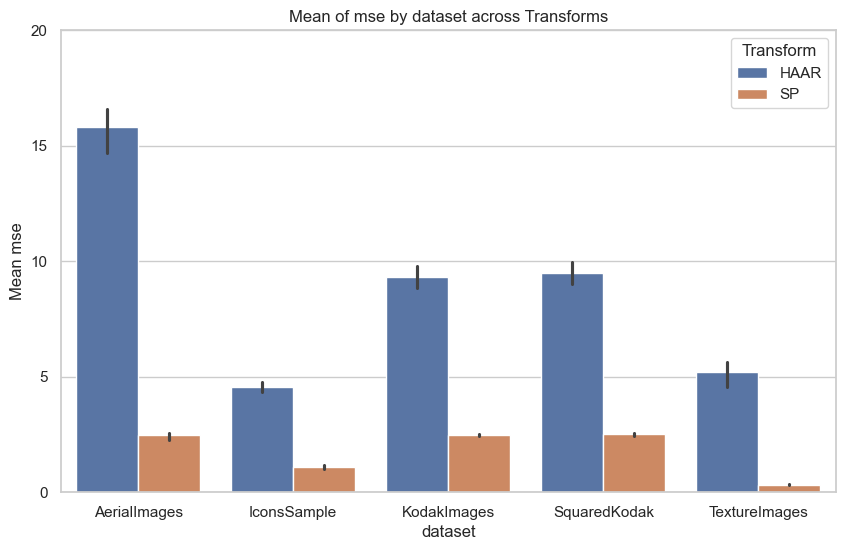

In [35]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Define the features for the plot
x_feature = 'dataset'
y_feature = 'mse'

plt.figure(figsize=(10, 6))

# Use Seaborn's barplot:
# x = your existing categorical feature
# y = your numerical feature (Seaborn defaults to plotting the mean)
# hue = the new 'Source' column to create separate bars for df1 and df2
ax = sns.barplot(
    data=merged_df,
    x=x_feature,
    y=y_feature,
    hue='Transform'
)
# ax.invert_yaxis()
ax.set_yticks(np.linspace(0, 10*np.ceil(merged_df[y_feature].max() / 10), 5))
plt.title(f'Mean of {y_feature} by {x_feature} across Transforms')
plt.xlabel(x_feature)
plt.ylabel(f'Mean {y_feature}')
plt.legend(title='Transform')
plt.show()